In [18]:
import sys
sys.path.append('../../activedrops')

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz
import pivdrops
import imageio.v2 as imageio


viz.set_plotting_style()

In [30]:
def compute_mean_intensity(image_folder_path):
    # Get all .tif files in the folder
    image_files = glob.glob(image_folder_path)
    
    # Initialize a dataframe to store results
    results_df = pd.DataFrame(columns=["frame", "mean_normalized_intensity"])
    
    # Loop through each image file
    for image_file in image_files:
        # Read the image
        img = imageio.imread(image_file)
        
        # Normalize the image
        normalized_img = img #/ np.max(img)
        
        # Compute the mean normalized fluorescence intensity
        mean_intensity = np.mean(normalized_img)
        
        # Extract frame number from the file name (assuming a specific format)
        frame_number = int(image_file.split('Untitled')[-1].split('.')[0])  # Adjust as per actual file name format
        
        # Append results to dataframe
        new_data = pd.DataFrame({
            "frame": [frame_number],
            "mean_normalized_intensity": [mean_intensity]
        })
        results_df = pd.concat([results_df, new_data], ignore_index=True)
    
    # Sort dataframe based on frame number
    results_df = results_df.sort_values(by='frame').reset_index(drop=True)
    
    return results_df


In [31]:
# Example usage:
k401_no_mt = "C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kva-kif-expression-nobeads/pos0-gfp_channel/Untitled****.tif"
k401_no_mt = compute_mean_intensity(k401_no_mt)

kif3_no_mt = "C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kva-kif-expression-nobeads/pos1-gfp_channel/Untitled****.tif"
kif3_no_mt = compute_mean_intensity(kif3_no_mt)

In [33]:
# Example usage:
k401_mt = "C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kva-kif-expression-nobeads/pos2-gfp_channel/Untitled****.tif"
k401_mt = compute_mean_intensity(k401_mt)

kif3_mt = "C:/Users/dalar/OneDrive/Desktop/current_experiment/100223-kva-kif-expression-nobeads/pos3-gfp_channel/Untitled****.tif"
kif3_mt = compute_mean_intensity(kif3_mt)

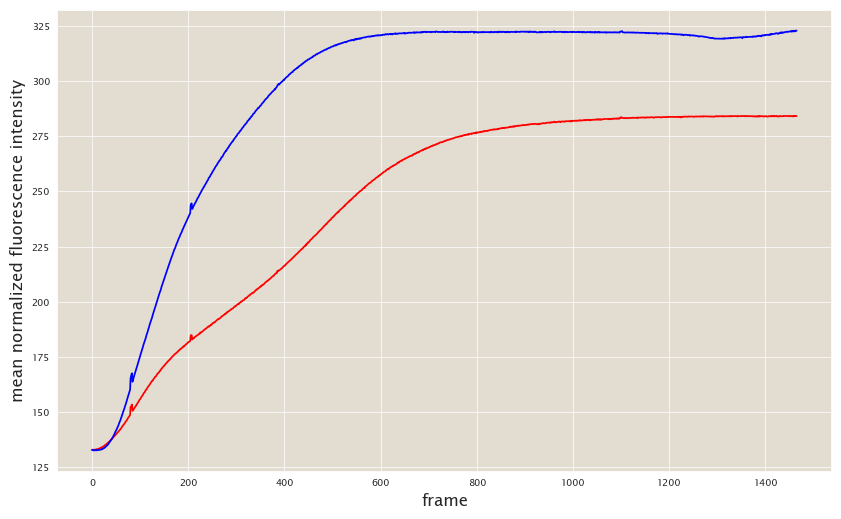

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(k401_no_mt['frame'], k401_no_mt['mean_normalized_intensity'], marker='o', linestyle='-', color='red')
# plt.plot(kif3_no_mt['frame'], kif3_no_mt['mean_normalized_intensity'], marker='o', linestyle='-', color='blue')

plt.plot(k401_mt['frame'], k401_mt['mean_normalized_intensity'], color='red')
plt.plot(kif3_mt['frame'], kif3_mt['mean_normalized_intensity'], color='blue')
# plt.title('Probability of Coiled Coil Formation Along Amino Acid Sequence')
plt.xlabel('frame')
plt.ylabel('mean normalized fluorescence intensity')
# plt.xticks(positions[::20], rotation=45)  # Adjusted from 10 to 20 to reduce x-axis crowding
# plt.grid(True, linestyle='--', alpha=0.5)

# # Save the plot
# output_file_path = "C:/Users/dalar/Downloads/naegleria.jpg"  # <-- Adjust this path
# plt.tight_layout()
# plt.savefig(output_file_path, format='jpg', dpi=300)

# Displaying the plot
plt.show()
